In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import subprocess
import sys

# Path del binario del genético
binario = '../bin/genetic_trainer'

# Cosas que no tocaremos
n = 7
m = 6
c = 4
p = str(n*m*2)
generaciones = 50
cross = 'c:completo'
mut = 'm:multi'

# Para crear el comando que ejecuta el genético
def comando_genetico(fitness, seleccion,pob,p_mut):
    res = [binario] + [str(n)]+[str(m)]+[str(c)]+[str(p)]
    res = res+ [str(generaciones)] +[str(pob)]+[str(p_mut)]
    res = res+[fitness]+[seleccion]+[cross]+[mut]
    return res

# Para ejecutar subprocess en shell con stdout live
def shell(command):
    p = subprocess.Popen(command, stdout=subprocess.PIPE, bufsize=1)
    for line in iter(p.stdout.readline, b''):
        sys.stdout.write(line)
    p.stdout.close()
    p.wait()

        
# Para guardar los logs

# Leo los fitness, los formateo en lista
def save_logs(path):
    with open('log/best_fitness_log.dat') as file:
        lista = file.read().splitlines()
    fitness = list(map(float, lista))

    # Leo los progenitores, los formateo en lista 
    with open('log/progenitores.dat') as file:
        lista = file.read().splitlines()
    for i in range(len(lista)):
        lista[i] = lista[i].split(',')
        lista[i] = list(map(float, lista[i]))
    progenitores = lista

    # Leo el ganador
    with open('log/ganador.dat') as file:
        lista = file.read().splitlines()
    ganador_fitness = float(lista[0])
    ganador_genoma = list(map(float, lista[1].split(',')))

    # Guardo todo como una super tupla
    np.save(path,(fitness,progenitores,ganador_fitness,ganador_genoma))

## Cambiando población

In [31]:
fit = 'f:vs_golosos'
sel = 's:rank'
p_mut = 0.1
pob_s_pablo = [50]
pob_s_nico =  [5,10,20,30]
pob_filename_pablo = ["save/genetico/exp_pob_" + str(pm) + ".npy" for pm in pob_s_pablo]
pob_filename_nico = ["save/genetico/exp_pob_" + str(pm) + ".npy" for pm in pob_s_nico]

## PABLO

In [ ]:
for i in range(len(pob_s_pablo)):
    command = comando_genetico(fit,sel,pob_s_pablo[i],p_mut)  
    # Ejecuto el entrenamiento. En ./log/ me deja los .dat como logs.
    shell(command)
    # Guardo los logs
    save_logs(pob_filename_pablo[i])    

## NICO

In [24]:
for i in range(len(pob_s_nico)):
    command = comando_genetico(fit,sel,pob_s_nico[i],p_mut)  
    # Ejecuto el entrenamiento. En ./log/ me deja los .dat como logs.
    shell(command)
    # Guardo los logs
    save_logs(pob_filename_nico[i])  

Creando entrenador...
-------------------------------------------------------
Población: 	5
Generaciones: 	50
P(mutación): 	0.1
Fitness: 	vs golosos random
Crossover: 	completo
Selección: 	por rank
Mutación: 	multi
-------------------------------------------------------
-------------------------------------------------------
> generacion 1
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.647
> seleccionando 2 progenitores
2	-10	-1	2	46	72	23	38	-98	23	
3	44	85	-3	-13	44	-17	-62	76	76	
> genereando nueva población
-------------------------------------------------------
> generacion 2
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.617
> seleccionando 2 progenitores
2	-10	-1	2	46	72	23	38	-98	23	
2	-88	-1	62	-13	44	23	38	-98	76	
> genereando nueva población
-------------------------------------------------------
> generacion 3
------------------------------------

	mejor fitness de la generación: 0.835
> seleccionando 2 progenitores
2	-19	-1	2	19	44	23	38	57	-16	
2	-19	64	2	19	44	23	38	57	23	
> genereando nueva población
-------------------------------------------------------
> generacion 28
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.825
> seleccionando 2 progenitores
2	-19	64	2	19	44	23	38	57	23	
2	-19	-1	2	19	44	23	38	57	-16	
> genereando nueva población
-------------------------------------------------------
> generacion 29
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.823
> seleccionando 2 progenitores
2	-19	-1	2	19	44	23	38	57	23	
2	-19	-1	2	19	44	23	38	57	-16	
> genereando nueva población
-------------------------------------------------------
> generacion 30
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.822
> seleccionando 2 progenitores
2	-

	mejor fitness de la generación: 0.67
> seleccionando 2 progenitores
4	-87	74	-96	72	91	77	-95	87	-49	
4	52	-73	-10	0	91	77	-46	87	-49	
> genereando nueva población
-------------------------------------------------------
> generacion 4
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.663
> seleccionando 2 progenitores
4	-87	74	-96	72	91	77	-95	87	-49	
4	-0	74	-96	72	91	77	-95	87	-49	
> genereando nueva población
-------------------------------------------------------
> generacion 5
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.679
> seleccionando 2 progenitores
4	-87	74	-96	72	91	77	-95	87	-49	
4	-0	74	-96	72	91	77	-95	87	-49	
> genereando nueva población
-------------------------------------------------------
> generacion 6
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.677
> seleccionando 2 pr

	mejor fitness de la generación: 0.814
> seleccionando 2 progenitores
4	-87	74	-0	43	91	77	10	78	-16	
4	-87	74	-0	43	91	77	10	78	-16	
> genereando nueva población
-------------------------------------------------------
> generacion 31
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.816
> seleccionando 2 progenitores
4	-87	74	-0	43	91	77	10	78	-16	
4	-87	74	-0	43	91	77	10	78	-16	
> genereando nueva población
-------------------------------------------------------
> generacion 32
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.801
> seleccionando 2 progenitores
4	-87	74	-0	43	91	77	10	78	-16	
4	-87	74	-0	43	91	77	10	78	-16	
> genereando nueva población
-------------------------------------------------------
> generacion 33
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.822
> seleccionando 2 progeni

	mejor fitness de la generación: 0.789
> seleccionando 2 progenitores
4	-92	93	0	5	85	88	7	-48	75	
4	-92	93	0	5	85	88	7	-48	87	
> genereando nueva población
-------------------------------------------------------
> generacion 7
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.784
> seleccionando 2 progenitores
4	-17	93	0	5	85	88	7	-48	75	
4	-92	93	0	5	85	88	7	-48	75	
> genereando nueva población
-------------------------------------------------------
> generacion 8
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.785
> seleccionando 2 progenitores
4	-17	93	0	5	85	88	7	-48	75	
4	-17	93	0	5	85	88	7	-48	75	
> genereando nueva población
-------------------------------------------------------
> generacion 9
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.808
> seleccionando 2 progenitores
4	-17	93	0	5	85

	mejor fitness de la generación: 0.849
> seleccionando 2 progenitores
-1	0	81	0	5	32	14	0	39	29	
-1	0	-10	0	5	32	14	0	39	75	
> genereando nueva población
-------------------------------------------------------
> generacion 34
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.844
> seleccionando 2 progenitores
-1	0	-10	0	5	32	14	0	39	75	
-1	0	-10	0	5	32	14	0	39	29	
> genereando nueva población
-------------------------------------------------------
> generacion 35
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.839
> seleccionando 2 progenitores
-1	0	-10	0	5	32	14	0	39	29	
-1	0	-30	0	5	32	14	0	84	75	
> genereando nueva población
-------------------------------------------------------
> generacion 36
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.845
> seleccionando 2 progenitores
-1	0	21	0	5	32	14	0

	mejor fitness de la generación: 0.789
> seleccionando 2 progenitores
4	-19	-0	-5	70	97	40	11	85	-75	
4	-19	-0	-5	70	97	46	11	85	-75	
> genereando nueva población
-------------------------------------------------------
> generacion 10
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.788
> seleccionando 2 progenitores
4	0	-0	-5	70	97	40	11	85	-75	
4	-19	-0	-5	70	97	40	11	85	-75	
> genereando nueva población
-------------------------------------------------------
> generacion 11
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.797
> seleccionando 2 progenitores
4	0	-0	-5	70	97	40	11	85	-75	
4	0	-0	-5	70	97	40	11	85	-75	
> genereando nueva población
-------------------------------------------------------
> generacion 12
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.797
> seleccionando 2 progenitores


	mejor fitness de la generación: 0.827
> seleccionando 2 progenitores
4	-75	77	0	18	97	40	-0	28	94	
4	-75	77	0	-0	97	40	-0	28	94	
> genereando nueva población
-------------------------------------------------------
> generacion 37
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.818
> seleccionando 2 progenitores
4	-75	77	0	18	97	40	-0	28	94	
4	-75	77	0	-0	97	40	-0	28	94	
> genereando nueva población
-------------------------------------------------------
> generacion 38
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.836
> seleccionando 2 progenitores
4	-75	77	0	18	97	40	-0	28	94	
4	-75	77	0	34	97	40	-0	28	94	
> genereando nueva población
-------------------------------------------------------
> generacion 39
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.864
> seleccionando 2 progenitores
4	-75	

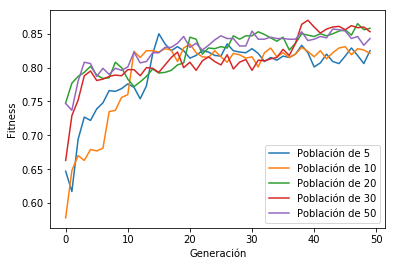

In [33]:
# Ploteo todas las curvas
pob_s_nico = [5,10,20
for i in range(len(pob_s_nico)+len(pob_s_pablo)):
    (fitness,progenitores,ganador_fitness,ganador_genoma) = np.load((pob_filename_nico+pob_filename_pablo)[i])
    plt.plot(fitness,label=('Población de '+str((pob_s_nico+pob_s_pablo)[i])))
    
plt.legend()
plt.xlabel('Generación')
plt.ylabel('Fitness')
plt.savefig('plots/genetico/poblaciones.pdf',bbox_inches='tight')

plt.show()
